#### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset and subset columns

In [2]:
houseprice_data = pd.read_csv("data/HousingPricesData.csv")

In [3]:
houseprice_data = houseprice_data[['Price', 'Area', 'Room']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
houseprice_data.head()

Price  Area  Room
0  685000.0    64     3
1  475000.0    60     3
2  850000.0   109     4
3  580000.0   128     6
4  720000.0   138     5

In [5]:
houseprice_data.shape

(924, 3)

#### Generate Summary Statistics

In [6]:
houseprice_data.describe().apply(lambda s: s.apply('{0:.1f}'.format))

Price   Area   Room
count      920.0  924.0  924.0
mean    622065.4   96.0    3.6
std     538994.2   57.4    1.6
min     175000.0   21.0    1.0
25%     350000.0   60.8    3.0
50%     467000.0   83.0    3.0
75%     700000.0  113.0    4.0
max    5950000.0  623.0   14.0

#### Calculate the Interquartile Range (IQR)

In [7]:
Q1 = houseprice_data['Price'].quantile(0.25)
Q3 = houseprice_data['Price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

350000.0


#### Identify univariate outliers using the IQR

In [8]:
houseprice_data.loc[(houseprice_data['Price'] < (Q1 - 1.5 * IQR)) |(houseprice_data['Price'] > (Q3 + 1.5 * IQR)),'Price']

20     1625000.0
28     1650000.0
31     1950000.0
33     3925000.0
57     1295000.0
         ...    
885    1450000.0
902    1300000.0
906    1250000.0
910    1698000.0
917    1500000.0
Name: Price, Length: 71, dtype: float64

#### Identify univariate outliers using Histograms 

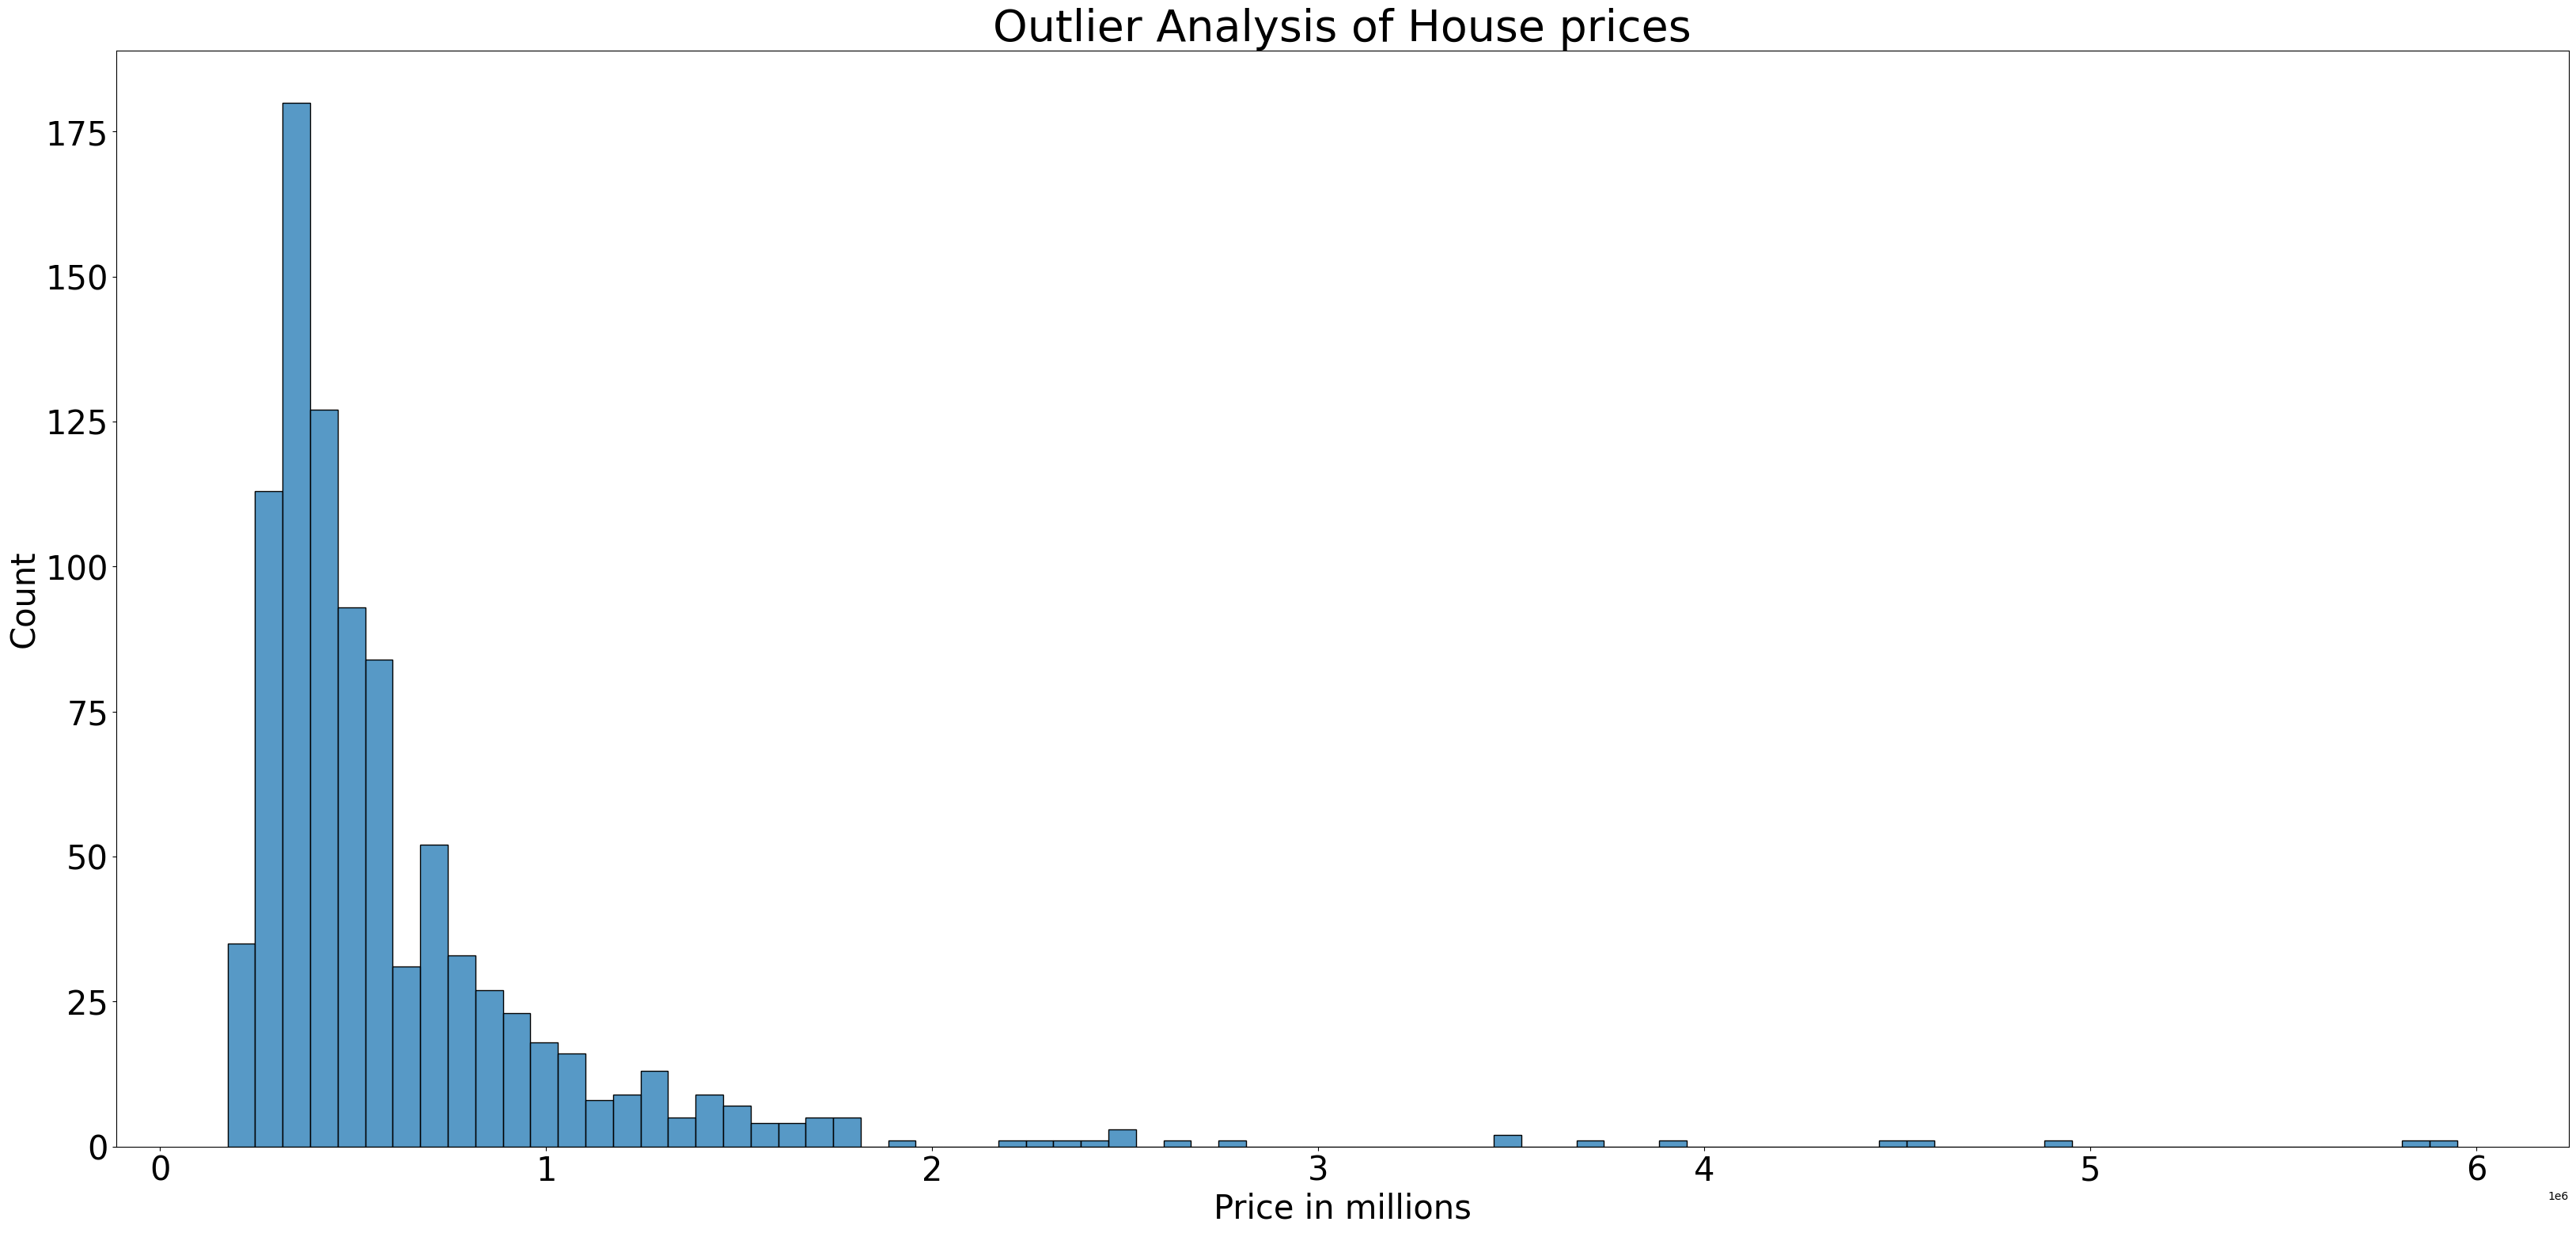

In [9]:
plt.figure(figsize = (40,18))

ax = sns.histplot(data= houseprice_data, x= 'Price')
ax.set_xlabel('Price in millions', fontsize = 30)
ax.set_ylabel('Count', fontsize = 30)
ax.set_title('Outlier Analysis of House prices', fontsize = 40)

plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

#### Identify univariate outliers using Boxplot

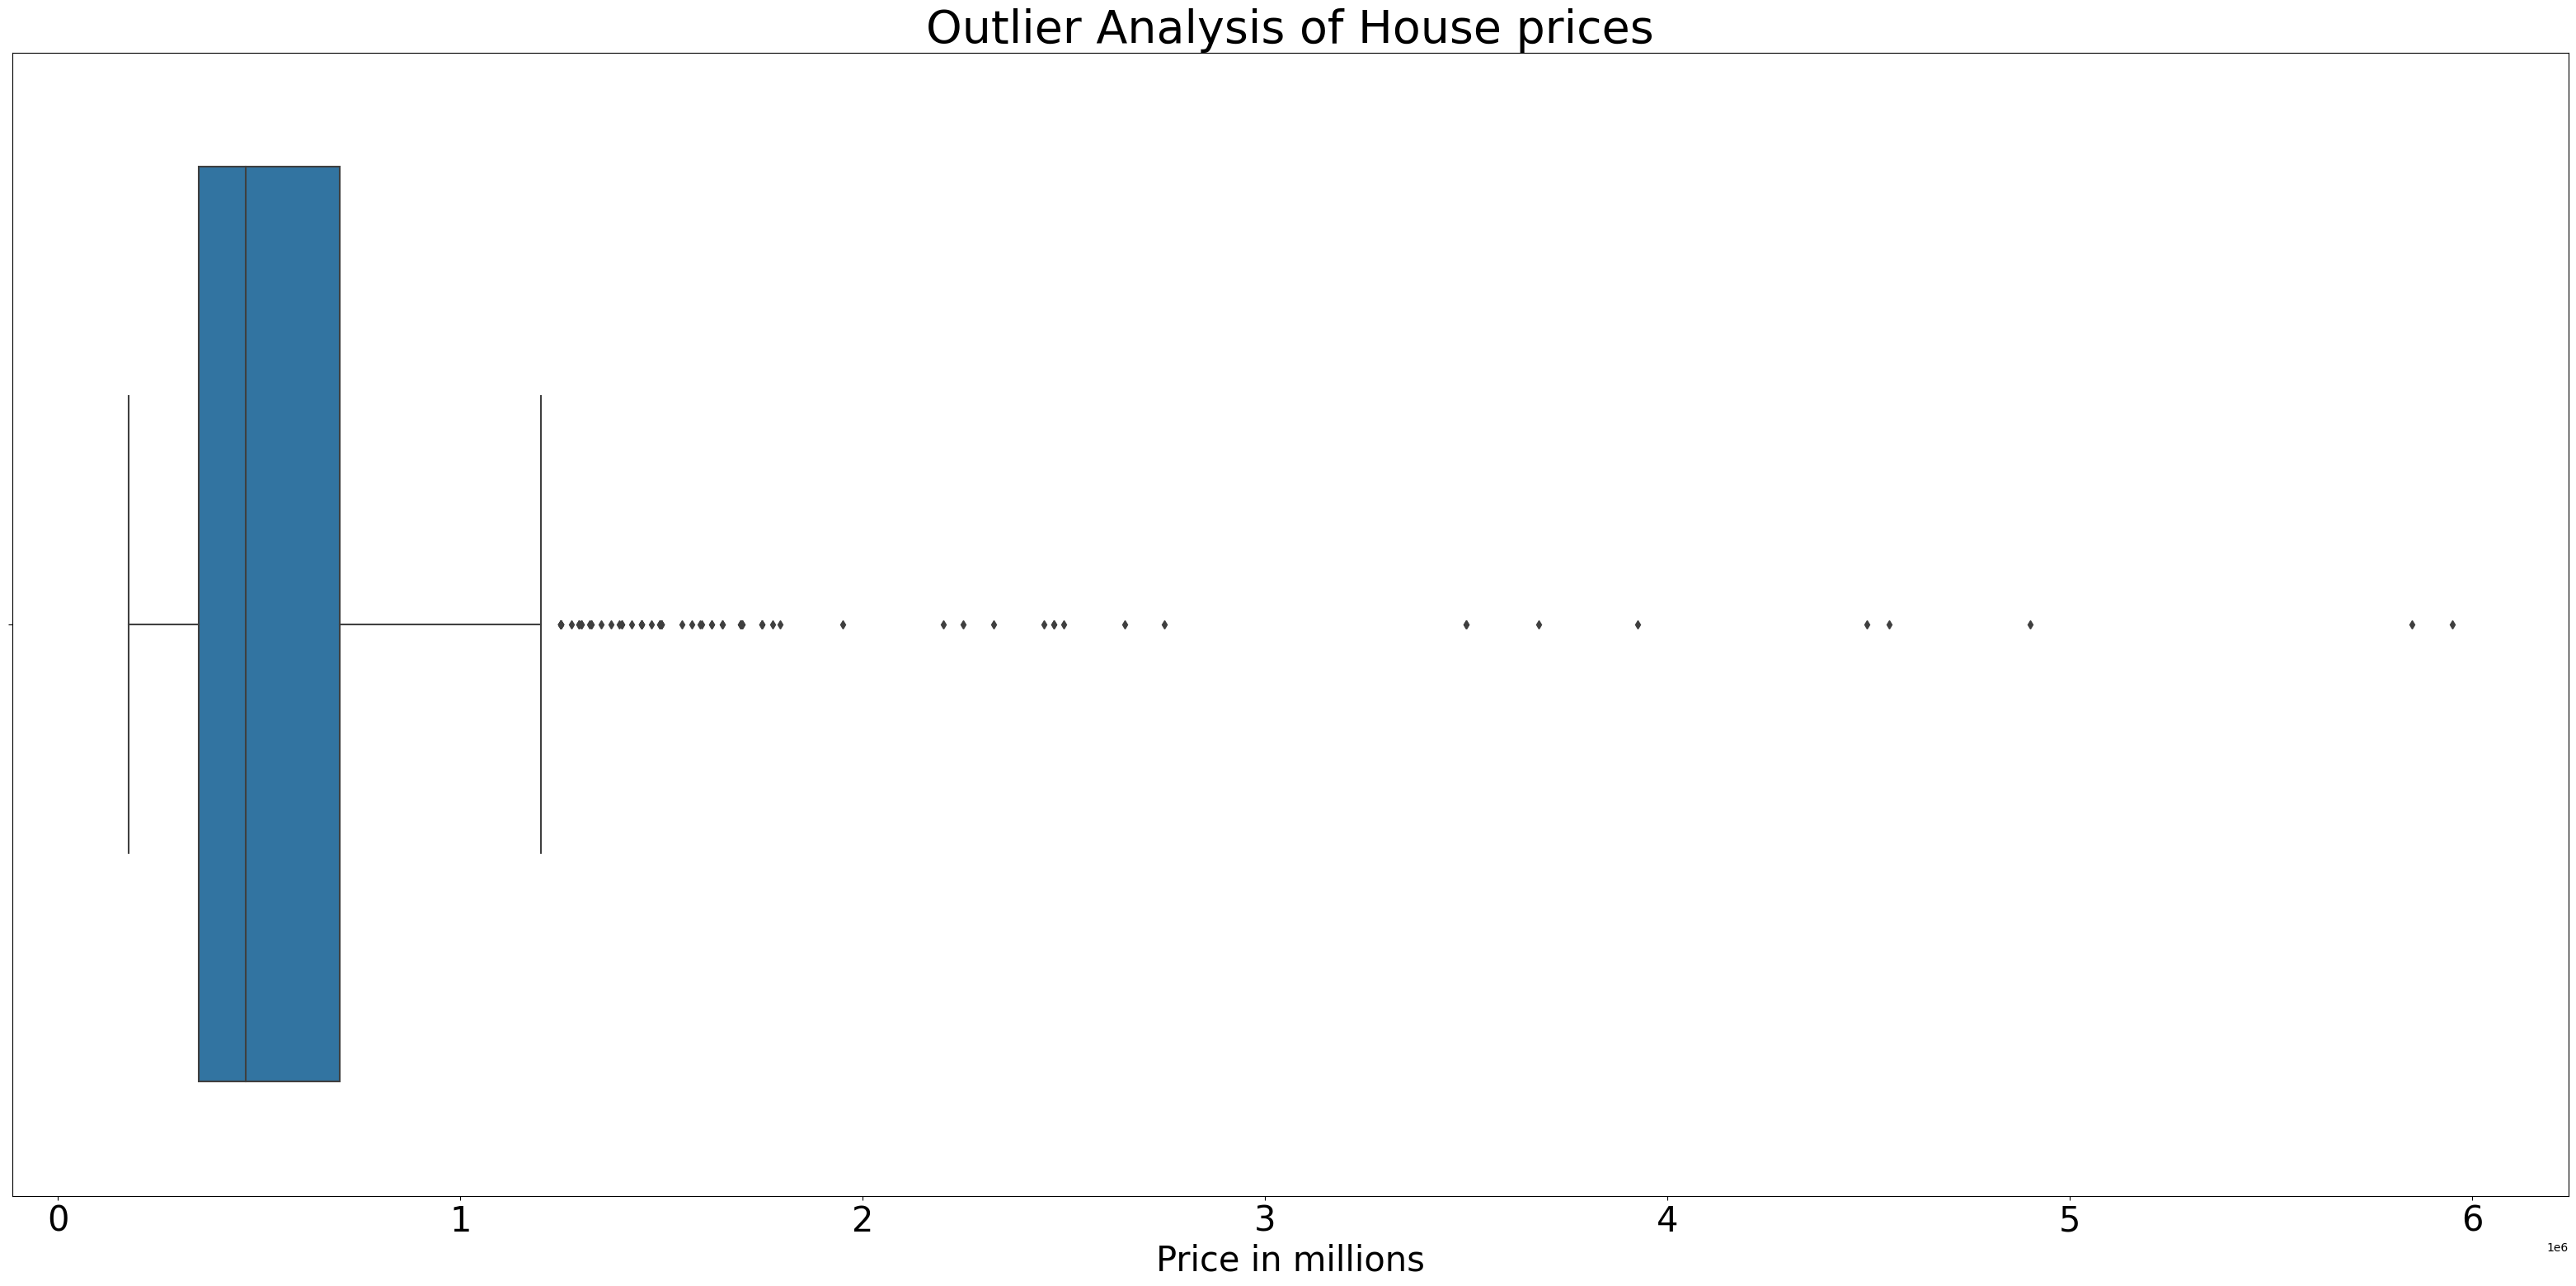

In [10]:
plt.figure(figsize = (40,18))

ax = sns.boxplot(data= houseprice_data, x= 'Price')
ax.set_xlabel('Price in millions', fontsize = 30)
ax.set_title('Outlier Analysis of House prices', fontsize = 40)

plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()